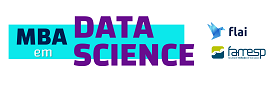

# **Copa do Mundo de Futebol Masculino**

## **Entendendo o contexto**

### **Copa do mundo de futebol masculino**

Quem nunca acompanhou a tabela, assistiu aos jogos ou participou de uma resenha da copa do mundo de futebol? Por mais que não seja ligado ao futebol, o Brasileiro, de alguma forma acaba envolvido com este evento. Este evento, que ocorre de quatro em quatro ano, mexe com o dia-a-dia dos Brasileiros. Algumas instituições/empresas dão folga ou  para as atividades para acompanhar os jogos da seleção brasileira de futebol neste torneio.

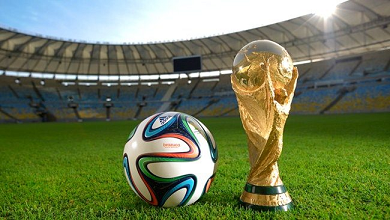

### **O Objetivo da Aula**

Compreender resultados das copas do mundo de futebol masculino através de visualização de dados.

### **O dataset**

Estes conjuntos de dados, oriundos das estatísticas das copas do mundo de futebol masculino, foi estruturado de forma que cada instância corresponde a uma edição deste torneio, e os atributos são:

- **Year:** Ano de realização do torneio
- **Country:** País sede do torneio
- **Winner:** Campeão
- **Runners-Up:** Segundo Colocado
- **Third:** Terceiro Colocado
- **Fourth:** Quarto Colocado
- **GoalsScored:** Total de Gols do torneio
- **QualifiedTeams:** Seleções participantes do torneio
- **MatchesPlayed:** Partidas disputadas no torneio
- **Attendance:** Público total do torneio
- **Attendance_per_Matches:** Público médio por partida 

O conjunto de dado está disponível em um repositório no GitHub que pode ser acessado através dos links:

- https://raw.githubusercontent.com/jonates/opendata/master/WorldCup/WorldCups.csv'


### **A Biblioteca Bokeh**

Bokeh é uma biblioteca python, muito poderosa, para visualização de dados. Para maiores informações da Bokeh, consulte a documentação no endereço a seguir:
- https://bokeh.org/

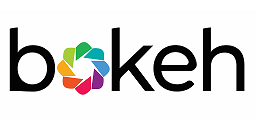

## **Hands-on**

1. **Carregar dados**;
2. **Entender a estrutura dos dados**;
3. **Transformar dados**;
4. **Elaboração do Gráfico**.

### **Carregando o conjunto de dados**

In [1]:
# Importando o Pandas
import pandas as pd

In [2]:
# Importando o conjunto de dados
cmf = pd.read_csv(
    filepath_or_buffer = 'https://raw.githubusercontent.com/jonates/opendata/master/WorldCup/WorldCups.csv', 
    sep=',',
    decimal='.'
)

### **Entendendo a estrutura o conjunto de dados**

In [3]:
# Espiando o conjunto de dados
cmf.head(20)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Attendance_per_Matches
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,434000,24139
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,395000,23235
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,483000,26833
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1337000,60773
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,943000,36269
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,868000,24800
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,776000,24250
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1614677,50459
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1673975,52312
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1774022,46685


In [4]:
# Espiando a estrutura do conjunto de dados
cmf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Year                    21 non-null     int64 
 1   Country                 21 non-null     object
 2   Winner                  21 non-null     object
 3   Runners-Up              21 non-null     object
 4   Third                   21 non-null     object
 5   Fourth                  21 non-null     object
 6   GoalsScored             21 non-null     int64 
 7   QualifiedTeams          21 non-null     int64 
 8   MatchesPlayed           21 non-null     int64 
 9   Attendance              21 non-null     int64 
 10  Attendance_per_Matches  21 non-null     int64 
dtypes: int64(6), object(5)
memory usage: 1.9+ KB


### **Análise das Copas do Mundo de Futebol Masculino**

#### **Preparando o ambiente para rodar gráficos em Bokeh**

In [10]:
# Importando de forma explícitas as bibliotecas
import bokeh.io
import bokeh.plotting

# Habilitando a visualização de gráficos gerados pelo Bokeh em Notebooks
bokeh.io.output_notebook()

#### **Total de Gols por Copa**

In [13]:
# Definindo configurações principais do gráficos
gols_por_copa = bokeh.plotting.figure(
    title="Gols por copa",
    width=600,
    height=400,
    x_axis_label="Ano",
    y_axis_label="Total de Gols",
    x_range=(1920, 2020)
)

In [14]:
# Elaborando o gráfico de linhas
gols_por_copa.line(x = cmf['Year'], y = cmf['GoalsScored'])

# Exibindo o gráfico de linhas
bokeh.io.show(gols_por_copa)

In [15]:
# Inserindo marcadores
gols_por_copa.circle(
    source=cmf, 
    x="Year", 
    y="GoalsScored"
)

# Exibindo o gráfico de linhas com os marcadores
bokeh.io.show(gols_por_copa)

#### **Média de Gols por partida por Copa**

In [16]:
# Calculando Média de Gols por partida
cmf['Goals_per_Matches'] = (cmf['GoalsScored'])\
                        .div(cmf['MatchesPlayed']) \
                        .round(2)

# Espiando a tabela
cmf.head()  

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Attendance_per_Matches,Goals_per_Matches
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,434000,24139,3.89
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,395000,23235,4.12
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,483000,26833,4.67
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1337000,60773,4.00
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,943000,36269,5.38


In [17]:
rotulos_popup = [("Ano", "$x{0f}"),("Média Gols por Jogo", "$y{0.2f}")]    

# Definindo configurações principais do gráficos
gols_por_partida = bokeh.plotting.figure(
    title="Gols por copa",
    width=600,
    height=400,
    x_axis_label="Ano",
    y_axis_label="Gol por partida",
    x_range=(1920, 2020),
    tooltips = rotulos_popup
)

# Elaborando o gráfico de linhas
gols_por_partida.line(
    x = cmf.Year, 
    y = cmf.Goals_per_Matches,
    legend_label="Gol por partida", 
    line_color="green", 
    line_width=2
)

# Inserindo os marcadores
gols_por_partida.circle(
    x = cmf.Year, 
    y = cmf.Goals_per_Matches,
    line_color="darkgreen", 
    line_width=2,
    fill_color="green", 
    size=10
)

# Ajusta orientação dos rótulos do eixo x
gols_por_partida.xaxis.major_label_orientation = "vertical"

# Mostrar todos os anos no eixo x
gols_por_partida.xaxis.ticker = cmf['Year']

# Ajustes adicionais
gols_por_partida.outline_line_color = None # Remove quadro contorno
gols_por_partida.grid.grid_line_color = None # Remove linhas de grades
#gols_por_partida.axis.axis_line_color = None # Remove linhas de eixo
gols_por_partida.legend.location ="top_right"

# Exibindo o gráfico de linhas com os marcadores
bokeh.io.show(gols_por_partida)

- https://docs.bokeh.org/en/latest/docs/reference/models/axes.html
- https://docs.bokeh.org/en/latest/docs/first_steps/first_steps_4.html

#### **Ranking dos Campeões**

In [18]:
# Resultados da partidas por ano
campeoes = cmf[['Winner']] \
  .value_counts()\
  .reset_index()\
  .rename(columns={0: 'Copas'})\
  .sort_values('Copas',ascending=False)


# Espiando o resultado
campeoes

,Winner,Copas
0,Brazil,5
1,Italy,4
2,Germany FR,3
3,Argentina,2
4,France,2
5,Uruguay,2
6,England,1
7,Germany,1
8,Spain,1


In [19]:
# Definindo configurações principais do gráficos
copas_vencidas_por_selecao = bokeh.plotting.figure(
    title="Quantidade de Copas vencidas por Seleção",
    width=600,
    height=400,
    x_axis_label="Quantidade de Copas",
    y_axis_label="Seleção",
    x_range=(0, 6),
    y_range=list(reversed(campeoes['Winner']))
)

# Elaborando o gráfico de barras
copas_vencidas_por_selecao.hbar(
    y = campeoes['Winner'], 
    right  = campeoes['Copas'], 
    height =0.9,
    line_color="darkgreen", 
    line_width=2,
    fill_color="green"
)

# Inserindo textos
copas_vencidas_por_selecao.text(
    x=campeoes['Copas']+0.1, 
    y=campeoes['Winner'], 
    text=campeoes['Copas'],
    text_font_style = 'bold',
    text_color="darkgreen",
    #valing = 'center'
)

# Exibindo o gráfico de linhas com os marcadores
bokeh.io.show(copas_vencidas_por_selecao)

- https://docs.bokeh.org/en/latest/docs/user_guide/categorical.html
- https://docs.bokeh.org/en/latest/docs/reference/models/glyphs/text.html
- 

#### **Público por partida**

In [20]:
rotulos_popup = [("Ano", "$x{0f}"),("Média Público por Jogo", "$y{0.2f}")]


# Definindo configurações principais do gráficos
publico_por_partida = bokeh.plotting.figure(
    title="Público médio por partida",
    width=800,
    height=300,
    x_axis_label="Ano",
    y_axis_label="Púbico médio",
    x_range=(1920,2020),
    toolbar_location=None,
    tooltips = rotulos_popup
)

# Elaborando o gráfico de barras
publico_por_partida.vbar(
    source = cmf,
    x = 'Year',#cmf['Year'], 
    top = 'Attendance_per_Matches',#cmf['Attendance_per_Matches'],
    width  = 3, 
    line_color="maroon", 
    line_width=2,
    fill_color="brown"
)

# Inserindo textos
publico_por_partida.text(
    x=cmf['Year']-1.5, 
    y=cmf['Attendance_per_Matches'], 
    text=cmf['Attendance_per_Matches'],
    text_font_style = 'bold',
    text_color="brown",
    text_font_size = {'value': '8px'}
)

# Ajusta orientação dos rótulos do eixo x
publico_por_partida.xaxis.major_label_orientation = "vertical"

# Mostrar todos os anos no eixo x
publico_por_partida.xaxis.ticker = cmf['Year']

# Exibindo o gráfico de linhas com os marcadores
bokeh.io.show(publico_por_partida)

- https://docs.bokeh.org/en/2.4.1/docs/reference/plotting/figure.html
- https://docs.bokeh.org/en/latest/docs/user_guide/styling.html
- https://docs.bokeh.org/en/latest/docs/reference/colors.html
- https://docs.bokeh.org/en/latest/docs/user_guide/tools.html

### **Faça Você mesmo**

Baseado nos conhecimentos desta aula, construa gráficos com a biblioteca Bokeh, para visualizar panoramas das operações de financiamentos do BNDES.

O conjunto de dados está disponível para download no link:
- https://raw.githubusercontent.com/jonates/opendata/master/bndes/operacoes-financiamento-operacoes-nao-automaticas.csv